In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Directories for training, validation, and test data
train_dir = '/kaggle/input/garbage-classificationss/train'
val_dir = '/kaggle/input/garbage-classificationss/val'
test_dir = '/kaggle/input/garbage-classificationss/test'

# Initialize ImageDataGenerator with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test data generators without augmentation
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load MobileNet model with ImageNet weights, exclude the fully connected top layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model layers initially

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Create the complete model
mobilenet_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
mobilenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50  # Adjust based on performance
)
# Fine-tune by unfreezing some layers
for layer in base_model.layers[-4:]:  # Unfreeze last few layers
    layer.trainable = True

# Re-compile and further train the model with fine-tuning
mobilenet_model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_finetune = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50  # Adjust based on performance
)


Found 2377 images belonging to 6 classes.
Found 806 images belonging to 6 classes.
Found 383 images belonging to 6 classes.
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730347194.827650     118 service.cc:145] XLA service 0x7f4198004f60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730347194.827726     118 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/75 ━━━━━━━━━━━━━━━━━━━━ 12:28 10s/step - accuracy: 0.0938 - loss: 2.1097

I0000 00:00:1730347198.388137     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 491ms/step - accuracy: 0.5732 - loss: 1.0957 - val_accuracy: 0.8300 - val_loss: 0.4448
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 351ms/step - accuracy: 0.8185 - loss: 0.5098 - val_accuracy: 0.8710 - val_loss: 0.3509
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 351ms/step - accuracy: 0.8557 - loss: 0.3971 - val_accuracy: 0.8970 - val_loss: 0.2847
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 349ms/step - accuracy: 0.8802 - loss: 0.3244 - val_accuracy: 0.9107 - val_loss: 0.2263
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 356ms/step - accuracy: 0.8931 - loss: 0.2976 - val_accuracy: 0.9392 - val_loss: 0.1893
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 355ms/step - accuracy: 0.9138 - loss: 0.2445 - val_accuracy: 0.9280 - val_loss: 0.1750
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 365ms/step - accuracy: 0.9429 - loss: 0.1786 - val_accuracy: 0.9417 - val_loss: 0.1699
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 355ms/step - accuracy: 0.9403 - loss: 0.1820 - val_accuracy: 0.944

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 371ms/step


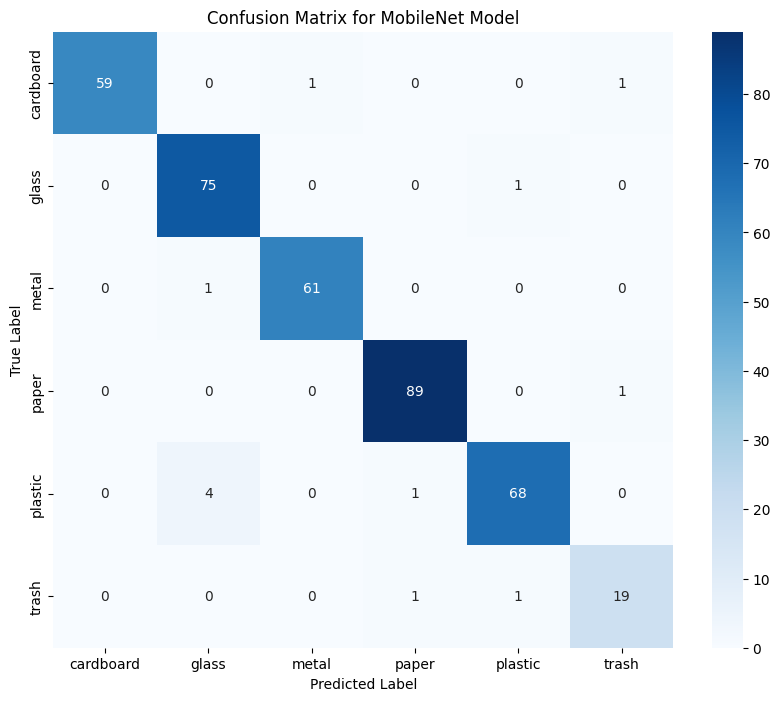

Classification Report for MobileNet Model:
              precision    recall  f1-score   support

   cardboard       1.00      0.97      0.98        61
       glass       0.94      0.99      0.96        76
       metal       0.98      0.98      0.98        62
       paper       0.98      0.99      0.98        90
     plastic       0.97      0.93      0.95        73
       trash       0.90      0.90      0.90        21

    accuracy                           0.97       383
   macro avg       0.96      0.96      0.96       383
weighted avg       0.97      0.97      0.97       383



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test data
test_predictions = mobilenet_model.predict(test_generator)
y_pred = np.argmax(test_predictions, axis=1)
y_true = test_generator.classes  # True labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for MobileNet Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report for MobileNet Model:")
print(report)


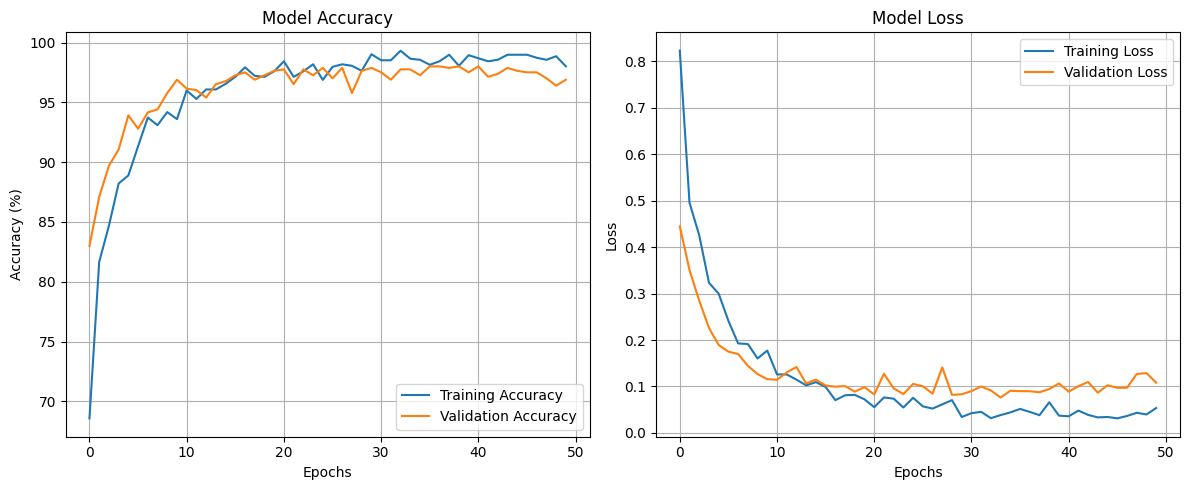

In [5]:
# Convert training and validation accuracy to percentages
train_accuracy = [acc * 100 for acc in history.history['accuracy']]
val_accuracy = [acc * 100 for acc in history.history['val_accuracy']]

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [7]:
# Calculate training accuracy
train_accuracy = history.history['accuracy'][-1] * 100  # Last epoch accuracy
print(f'Training Accuracy: {train_accuracy:.2f}%')

# Calculate validation accuracy
val_accuracy = history.history['val_accuracy'][-1] * 100  # Last epoch validation accuracy
print(f'Validation Accuracy: {val_accuracy:.2f}%')

# Calculate test accuracy
test_loss, test_accuracy = mobilenet_model.evaluate(test_generator)
test_accuracy_percentage = test_accuracy * 100  # Convert to percentage
print(f'Test Accuracy: {test_accuracy_percentage:.2f}%')


Training Accuracy: 98.02%
Validation Accuracy: 96.90%
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - accuracy: 0.9726 - loss: 0.0979
Test Accuracy: 96.87%


In [9]:
import os
import numpy as np
from keras.preprocessing import image

# Directory for test data
test_dir = '/kaggle/input/garbage-classificationss/test'  # Ensure this path exists and contains images

# Class labels (ensure this matches your training order)
class_labels = list(test_generator.class_indices.keys())  # Get class labels from the test generator

# Initialize lists to store predictions and true labels
predictions_list = []
true_labels_list = []

# Loop through each class directory in the test data
for class_label in class_labels:
    class_dir = os.path.join(test_dir, class_label)
    if os.path.exists(class_dir):
        # Loop through each image in the class folder
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            if os.path.isfile(img_path):
                # Load and preprocess the image
                img = image.load_img(img_path, target_size=(224, 224))
                img_array = image.img_to_array(img) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                # Make a prediction
                predictions = mobilenet_model.predict(img_array)
                predicted_class = np.argmax(predictions, axis=1)[0]

                # Store the predicted label
                predictions_list.append(predicted_class)
                true_labels_list.append(class_labels.index(class_label))

                # Print the predicted label
                predicted_label = class_labels[predicted_class]
                print(f"Image: {img_name}, Predicted Class: {predicted_label}")

# You can also calculate the overall accuracy on the test set if desired
accuracy = np.sum(np.array(predictions_list) == np.array(true_labels_list)) / len(true_labels_list)
print(f"Overall Test Accuracy: {accuracy:.2%}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Image: cardboard403.jpg, Predicted Class: cardboard
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: cardboard132.jpg, Predicted Class: cardboard
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image: cardboard3.jpg, Predicted Class: cardboard
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: cardboard92.jpg, Predicted Class: cardboard
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: cardboard306.jpg, Predicted Class: cardboard
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image: cardboard89.jpg, Predicted Class: cardboard
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Image: cardboard320.jpg, Predicted Class: cardboard
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: cardboard248.jpg, Predicted Class: cardboard
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: cardboard148.jpg, Predicted Class: cardboard
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: cardboard117.jpg, Predicted Class: cardboard
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image: cardboard262.jpg, Predicted Class: cardboard
1/1 ━━━━━━━━━━━━